In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Axes: >

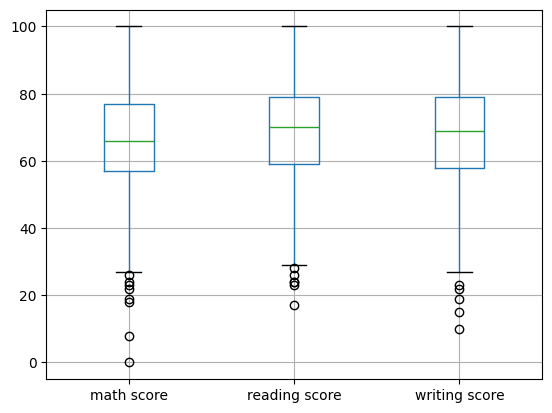

In [5]:
df.boxplot()

# Outliers

In [6]:
#first method for removing the outliers
newdf = df[df['math score']>37]
newdf.boxplot()

<Axes: >

In [7]:
df.boxplot()

<Axes: >

In [8]:
import seaborn as sns

In [10]:
sns.boxplot(df['math score'])

<Axes: ylabel='math score'>

In [11]:
#second method
q1 = df['math score'].quantile(0.25)
q3 = df['math score'].quantile(0.75)
IQR = q3 - q1

lower_l = q1 - 1.5 * IQR
upper_l = q3 + 1.5 *IQR
print(lower_l,upper_l)
df = df[(df['math score']>= lower_l) & (df['math score']<=upper_l)]
sns.boxplot(df['math score'])


27.0 107.0


<Axes: ylabel='math score'>

# data transformation

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# copy DataFrame
new_df = df.copy()
# Select the columns want to scale
col_names = ['math score','reading score','writing score']
# Extract the features from the DataFrame
features = new_df[col_names]

In [14]:
# Fit and transform the selected features using MinMaxScaler
new_df[col_names] = scaler.fit_transform(features.values)
# Display the summary statistics of the scaled columns
new_df[col_names].describe()

,math score,reading score,writing score
count,992.000000,992.000000,992.000000
mean,0.540834,0.603399,0.627929
std,0.199452,0.185316,0.174261
min,0.000000,0.000000,0.000000
25%,0.410959,0.480519,0.505882
50%,0.534247,0.610390,0.635294
75%,0.684932,0.740260,0.752941
max,1.000000,1.000000,1.000000


In [20]:
sns.displot(data=new_df['math score'],kde=True)

In [16]:
sns.displot(data=new_df['reading score'],kde=True)